<a href="https://colab.research.google.com/github/nidheesh-p/AI-Learning/blob/master/Introduction_To_Agents_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install langchainhub
!pip install langchain-openai
!pip install langchain
!pip install beautifulsoup4
!pip install langchain-community
!pip install faiss-cpu
!pip install -U langchain-community tavily-python
!pip install gradio_client==0.2.10
!pip install gradio==3.38.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.2 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 25.0
    Uninstalling packaging-25.0:
      Successfully uninstalled packaging-25.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.5/80.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.2/467.2 kB 12.3 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.79
    Uninstalling langchain-core-0.3.79:
      Successfully uninstalled langchain-core-0.3.79
ERROR: Operation cancelled by user
^C


In [ ]:
print("hello")

for i in range(10):
  print(i)

hello
0
1
2
3
4
5
6
7
8
9


In [ ]:
import openai


In [ ]:
import os
from google.colab import userdata
os.environ["OPENAI_API_KEY"] = userdata.get("OPENAI_API_KEY")
openai.api_key = os.environ["OPENAI_API_KEY"]


In [ ]:
response = openai.chat.completions.create(
    model="gpt-3.5-turbo-16k",
    messages=[{"role": "user", "content": "what is uber revenue today."}]
)

print(response.choices[0].message.content)

According to Uber's latest annual report, their total revenue for 2020 was $11.14 billion.


In [ ]:
response = openai.chat.completions.create(
    model="gpt-3.5-turbo-16k",
    messages=[{"role": "user", "content": "what is todays date. "}]
)

print(response.choices[0].message.content)

Today's date is July 22, 2021.


In [ ]:
import getpass
import os
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_openai import ChatOpenAI
from langchain.chains import create_retrieval_chain

In [ ]:
# os.environ["OPENAI_API_KEY"] = getpass.getpass()
# os.environ["TAVILY_API_KEY"] = getpass.getpass()

In [ ]:
import os
from google.colab import userdata

os.environ["OPENAI_API_KEY"] = userdata.get("OPENAI_API_KEY")
os.environ["TAVILY_API_KEY"] = userdata.get("TAVILY_API_KEY")

# Setup the retriver

In [ ]:
from langchain_community.document_loaders import WebBaseLoader

# loader = WebBaseLoader("https://docs.smith.langchain.com/")
loader = WebBaseLoader("https://en.wikipedia.org/wiki/Microsoft")

docs = loader.load()

In [ ]:
from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings()

In [ ]:
from langchain_community.vectorstores import FAISS
from langchain_text_splitters import RecursiveCharacterTextSplitter


text_splitter = RecursiveCharacterTextSplitter()
documents = text_splitter.split_documents(docs)
vector = FAISS.from_documents(documents, embeddings)

In [ ]:
pip install faiss-cpu


  Using cached faiss_cpu-1.12.0-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (5.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 37.6 MB/s eta 0:00:00


In [ ]:
print(documents)

[Document(metadata={'source': 'https://en.wikipedia.org/wiki/Microsoft', 'title': 'Microsoft - Wikipedia', 'language': 'en'}, page_content='Microsoft - Wikipedia\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nJump to content\n\n\n\n\n\n\n\nMain menu\n\n\n\n\n\nMain menu\nmove to sidebar\nhide\n\n\n\n\t\tNavigation\n\t\n\n\nMain pageContentsCurrent eventsRandom articleAbout WikipediaContact us\n\n\n\n\n\n\t\tContribute\n\t\n\n\nHelpLearn to editCommunity portalRecent changesUpload fileSpecial pages\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSearch\n\n\n\n\n\n\n\n\n\n\n\nSearch\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nAppearance\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nDonate\n\nCreate account\n\nLog in\n\n\n\n\n\n\n\n\nPersonal tools\n\n\n\n\n\nDonate Create account Log in\n\n\n\n\n\n\t\tPages for logged out editors learn more\n\n\n\nContributionsTalk\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nContents\nmove to sidebar\nhide\n\n\n\n\n(Top)\n\n\n\n\n\n1\nHistory\n\n\n\n\n

In [ ]:
from langchain.chains.combine_documents import create_stuff_documents_chain
# create_stuff_documents_chain :
#  Create a chain for passing a list of Documents to a model.

llm = ChatOpenAI(api_key=os.environ["OPENAI_API_KEY"])
output_parser = StrOutputParser()

prompt = ChatPromptTemplate.from_template("""Answer the following question based only on the provided context:

<context>
{context}
</context>

Question: {input}""", output_parser = output_parser)

document_chain = create_stuff_documents_chain(llm, prompt) # prompt | llm

In [ ]:
retriever = vector.as_retriever()
retrieval_chain = create_retrieval_chain(retriever, document_chain)

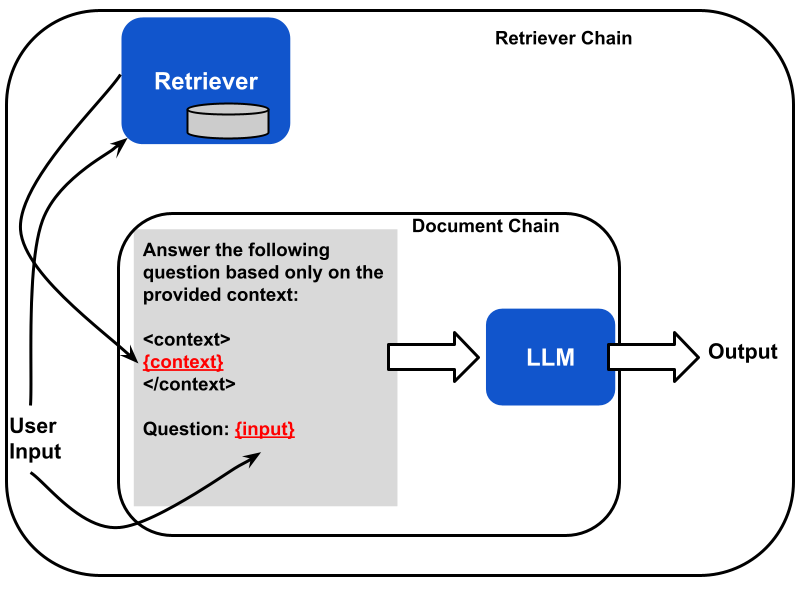

# **Agents**

In [ ]:
from langchain.tools.retriever import create_retriever_tool

# retriever_tool = create_retriever_tool(
#     retriever,
#     "langsmith_search",
#     "Search for information about LangSmith. For any questions about LangSmith, you must use this tool!",
# )

retriever_tool = create_retriever_tool(
    retriever,
    "microsoft_search",
    "Search for information about Microsoft. For any questions about Microsoft, you must use this tool!",
)

In [ ]:
# from langchain_community.tools.tavily_search import TavilySearchResults

# search = TavilySearchResults()

from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_community.utilities.tavily_search import TavilySearchAPIWrapper

# Replace 'YOUR_API_KEY_HERE' with your actual Tavily API key
search = TavilySearchResults(api_wrapper=TavilySearchAPIWrapper(tavily_api_key=os.environ["TAVILY_API_KEY"]))


# Tavily is a search engine specifically designed for AI agents and Large Language Models (LLMs).
# It focuses on providing real-time, accurate, and factual information for AI-driven applications.
# Unlike general-purpose search engines, Tavily prioritizes providing high-quality, concise, and readily usable data for AI to process.

# List of other tools - https://python.langchain.com/docs/integrations/tools/



In [ ]:
search.invoke({"query": "Weather in SF?"})

"HTTPError('401 Client Error: Unauthorized for url: https://api.tavily.com/search')"

In [ ]:
tools = [retriever_tool, search]

In [ ]:
from langchain_openai import ChatOpenAI
from langchain import hub
from langchain.agents import create_openai_functions_agent
from langchain.agents import AgentExecutor

# Get the prompt to use - you can modify this!
prompt = hub.pull("hwchase17/openai-functions-agent") # api_key=os.environ["OPENAI_API_KEY"]

# prompt = ChatPromptTemplate.from_messages([
#     ("system", "You are a helpful assistant"),
#     MessagesPlaceholder("chat_history", optional=True),
#     ("human", "{input}"),
#     MessagesPlaceholder("agent_scratchpad"),
# ])

# You need to set OPENAI_API_KEY environment variable or pass it as argument `api_key`.
llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=0)
agent = create_openai_functions_agent(llm, tools, prompt)
agent_executor = AgentExecutor(agent=agent, tools=tools, return_intermediate_steps=True ,verbose=True)

In [ ]:
agent_executor

AgentExecutor(verbose=True, agent=RunnableAgent(runnable=RunnableAssign(mapper={
  agent_scratchpad: RunnableLambda(lambda x: format_to_openai_function_messages(x['intermediate_steps']))
})
| ChatPromptTemplate(input_variables=['agent_scratchpad', 'input'], optional_variables=['chat_history'], input_types={'chat_history': list[typing.Annotated[typing.Union[typing.Annotated[langchain_core.messages.ai.AIMessage, Tag(tag='ai')], typing.Annotated[langchain_core.messages.human.HumanMessage, Tag(tag='human')], typing.Annotated[langchain_core.messages.chat.ChatMessage, Tag(tag='chat')], typing.Annotated[langchain_core.messages.system.SystemMessage, Tag(tag='system')], typing.Annotated[langchain_core.messages.function.FunctionMessage, Tag(tag='function')], typing.Annotated[langchain_core.messages.tool.ToolMessage, Tag(tag='tool')], typing.Annotated[langchain_core.messages.ai.AIMessageChunk, Tag(tag='AIMessageChunk')], typing.Annotated[langchain_core.messages.human.HumanMessageChunk, Tag(tag='H

In [ ]:
print(prompt)

input_variables=['agent_scratchpad', 'input'] optional_variables=['chat_history'] input_types={'chat_history': list[typing.Annotated[typing.Union[typing.Annotated[langchain_core.messages.ai.AIMessage, Tag(tag='ai')], typing.Annotated[langchain_core.messages.human.HumanMessage, Tag(tag='human')], typing.Annotated[langchain_core.messages.chat.ChatMessage, Tag(tag='chat')], typing.Annotated[langchain_core.messages.system.SystemMessage, Tag(tag='system')], typing.Annotated[langchain_core.messages.function.FunctionMessage, Tag(tag='function')], typing.Annotated[langchain_core.messages.tool.ToolMessage, Tag(tag='tool')], typing.Annotated[langchain_core.messages.ai.AIMessageChunk, Tag(tag='AIMessageChunk')], typing.Annotated[langchain_core.messages.human.HumanMessageChunk, Tag(tag='HumanMessageChunk')], typing.Annotated[langchain_core.messages.chat.ChatMessageChunk, Tag(tag='ChatMessageChunk')], typing.Annotated[langchain_core.messages.system.SystemMessageChunk, Tag(tag='SystemMessageChunk')]

In [ ]:
result = agent_executor.invoke({"input": "Who is Satya Nadella?"})



> Entering new AgentExecutor chain...

Invoking: `microsoft_search` with `{'query': 'Satya Nadella'}`


2014–2020: Windows 10, Microsoft Edge, and HoloLens
Satya Nadella succeeded Steve Ballmer as the CEO of Microsoft in February 2014.
On February 4, 2014, Steve Ballmer stepped down as CEO of Microsoft and was succeeded by Satya Nadella, who previously led Microsoft's Cloud and Enterprise division.[94] On the same day, John W. Thompson took on the role of chairman, in place of Bill Gates, who continued to participate as a technology advisor.[95] Thompson became the second chairman in Microsoft's history.[96] On April 25, 2014, Microsoft acquired Nokia Devices and Services for $7.2 billion.[97] This new subsidiary was renamed Microsoft Mobile Oy.[98] On September 15, 2014, Microsoft acquired the video game development company Mojang, best known for Minecraft, for $2.5 billion.[99] On June 8, 2017, Microsoft acquired Hexadite, an Israeli security firm, for $100 million.[100][101]
On Ja

In [ ]:
print(result['output'])

Satya Nadella is the CEO of Microsoft. He succeeded Steve Ballmer as the CEO in February 2014. Nadella previously led Microsoft's Cloud and Enterprise division before becoming the CEO. Under his leadership, Microsoft has made significant acquisitions, such as Nokia Devices and Services and Mojang, the company behind Minecraft. Nadella has also been involved in strategic decisions like the merger of Microsoft's PC and Xbox divisions and the launch of new products like Surface Hub and Windows 10. Additionally, Microsoft has made advancements in areas like data protection, education technology, and quantum computing during Nadella's tenure as CEO.


In [ ]:
print(prompt.input_variables)
print(prompt.messages)

['agent_scratchpad', 'input']
[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are a helpful assistant'), additional_kwargs={}), MessagesPlaceholder(variable_name='chat_history', optional=True), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, template='{input}'), additional_kwargs={}), MessagesPlaceholder(variable_name='agent_scratchpad')]


In [ ]:
print(prompt.messages)

[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are a helpful assistant'), additional_kwargs={}), MessagesPlaceholder(variable_name='chat_history', optional=True), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, template='{input}'), additional_kwargs={}), MessagesPlaceholder(variable_name='agent_scratchpad')]


In [ ]:
for msg in prompt.messages:
    print(msg)
    print("--------")

prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are a helpful assistant') additional_kwargs={}
--------
variable_name='chat_history' optional=True
--------
prompt=PromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, template='{input}') additional_kwargs={}
--------
variable_name='agent_scratchpad'
--------


In [ ]:
# result = agent_executor.invoke({"input": "What can I use langsmith for?"})

result = agent_executor.invoke({"input": "Who is bil gates?"})



> Entering new AgentExecutor chain...
Bill Gates is a co-founder of Microsoft, a technology company known for its software products such as the Windows operating system and Microsoft Office suite. Bill Gates is also a philanthropist and co-chair of the Bill & Melinda Gates Foundation, which focuses on global health, education, and poverty alleviation. He is one of the wealthiest individuals in the world and has made significant contributions to technology and society.

> Finished chain.


In [ ]:
result

{'input': 'Who is bil gates?',
 'output': 'Bill Gates is a co-founder of Microsoft, a technology company known for its software products such as the Windows operating system and Microsoft Office suite. Bill Gates is also a philanthropist and co-chair of the Bill & Melinda Gates Foundation, which focuses on global health, education, and poverty alleviation. He is one of the wealthiest individuals in the world and has made significant contributions to technology and society.',
 'intermediate_steps': []}

In [ ]:
agent_executor.invoke({"input": "Who are the most important people at microsoft over the years?"})



> Entering new AgentExecutor chain...

Invoking: `microsoft_search` with `{'query': 'most important people at Microsoft over the years'}`


2007–2011: Microsoft Azure, Windows Vista, Windows 7, and Microsoft Stores
CEO Steve Ballmer at the MIX event in 2008. In an interview about his management style in 2005, he mentioned that his first priority was to get the people he delegates to in order. Ballmer also emphasized the need to continue pursuing new technologies even if initial attempts fail, citing the original attempts with Windows as an example.[53]
Headquarters of the European Commission, which has imposed several fines on Microsoft
Released in January 2007, the next version of Windows, Vista, focused on features, security and a redesigned user interface dubbed Aero.[54][55] Microsoft Office 2007, released at the same time, featured a "Ribbon" user interface which was a significant departure from its predecessors. Relatively strong sales of both products helped to produce a recor

{'input': 'Who are the most important people at microsoft over the years?',
 'output': "Some of the most important people at Microsoft over the years include:\n\n1. Bill Gates: Co-founder of Microsoft and played a significant role in the company's early success.\n2. Steve Ballmer: Former CEO of Microsoft who led the company through important product launches and initiatives.\n3. Satya Nadella: Current CEO of Microsoft who has shifted the company's focus towards cloud computing and led strategic acquisitions.\n4. John W. Thompson: Chairman of Microsoft's board of directors.\n5. Phil Spencer: Head of Microsoft's gaming division and instrumental in the Xbox brand.\n6. Reid Hoffman: Member of Microsoft's board of directors.\n7. Hugh Johnston: Member of Microsoft's board of directors.\n8. Teri List: Member of Microsoft's board of directors.\n9. Sandi Peterson: Member of Microsoft's board of directors.\n10. Penny Pritzker: Member of Microsoft's board of directors.\n\nThese individuals have p

In [ ]:
result["output"]

'Bill Gates is a co-founder of Microsoft, a technology company known for its software products such as the Windows operating system and Microsoft Office suite. Bill Gates is also a philanthropist and co-chair of the Bill & Melinda Gates Foundation, which focuses on global health, education, and poverty alleviation. He is one of the wealthiest individuals in the world and has made significant contributions to technology and society.'

In [ ]:
result = agent_executor.invoke({"input": "what is the weather in LA?"})



> Entering new AgentExecutor chain...

Invoking: `tavily_search_results_json` with `{'query': 'weather in Los Angeles'}`


HTTPError('401 Client Error: Unauthorized for url: https://api.tavily.com/search')I apologize, but I am currently unable to retrieve the weather information for Los Angeles. Is there anything else I can assist you with?

> Finished chain.


In [ ]:
print(result["output"])

I apologize for the inconvenience. It seems there was an error in retrieving the weather information for San Francisco. You can try checking a weather website or using a weather app to get the latest weather updates for San Francisco.


# **More on Tools**

In [ ]:
from langchain_core.tools import tool

In [ ]:
## Add two more tools that perform addition and exponentiation
@tool
def multiply(first_int: int, second_int: int) -> int:
    """Multiply two integers together."""
    return first_int * second_int

@tool
def add(first_int: int, second_int: int) -> int:
    "Add two integers."
    return first_int + second_int


@tool
def exponentiate(base: int, exponent: int) -> int:
    "Exponentiate the base to the exponent power."
    return base**exponent

In [ ]:
tools = [retriever_tool, search, multiply, add, exponentiate]

In [ ]:
print(multiply.name)
print(multiply.description)
print(multiply.args)

multiply
Multiply two integers together.
{'first_int': {'title': 'First Int', 'type': 'integer'}, 'second_int': {'title': 'Second Int', 'type': 'integer'}}


In [ ]:
multiply.invoke({"first_int": 4, "second_int": 5})

20

In [ ]:
from langchain.tools.render import render_text_description

rendered_tools = render_text_description([multiply])
print(rendered_tools)

multiply(first_int: int, second_int: int) -> int - Multiply two integers together.


In [ ]:
agent_executor.invoke({"input": "what is 2*2"})